In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [8]:
df = pd.read_csv("Data.csv")
info_df = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.count().values,
    "Data Type": df.dtypes.values
})
print(info_df)

print("-----------------------------------------------")
#missing value
missing_values = pd.DataFrame({
    "Column": df.columns,
    "Missing Values": df.isnull().sum().values
})
print(missing_values)


                            Column  Non-Null Count Data Type
0                           Gender            2111    object
1                              Age            2111     int64
2                           Height            2111   float64
3                           Weight            2111   float64
4   family_history_with_overweight            2111    object
5                             FAVC            2111    object
6                             FCVC            2111   float64
7                              NCP            2111   float64
8                             CAEC            2111    object
9                            SMOKE            2111    object
10                            CH2O            2111   float64
11                             SCC            2111    object
12                             FAF            2111   float64
13                             TUE            2111   float64
14                            CALC            2111    object
15                      

In [13]:
Statistical_Summary = df.describe()
print(Statistical_Summary)

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.315964     1.701620    86.586035     2.418986     2.685651   
std       6.357078     0.093368    26.191163     0.533996     0.778079   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      20.000000     1.630000    65.470000     2.000000     2.660000   
50%      23.000000     1.700000    83.000000     2.390000     3.000000   
75%      26.000000     1.770000   107.430000     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008053     1.010313     0.657861  
std       0.612950     0.850613     0.608926  
min       1.000000     0.000000     0.000000  
25%       1.585000     0.125000     0.000000  
50%       2.000000     1.000000     0.625000  
75% 

C:\Users\sky\AppData\Local\Temp\ipykernel_17256\2080440075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["NObeyesdad"], palette="viridis")


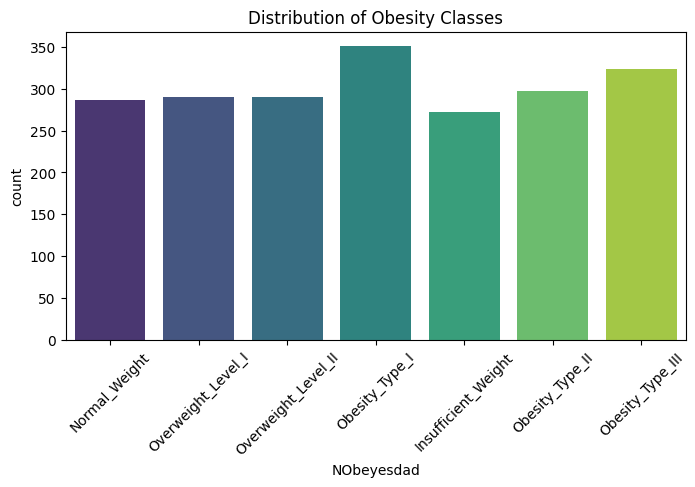

In [ ]:
# Distribution of Obesity Classes
plt.figure(figsize=(8, 4))
sns.countplot(x=df["NObeyesdad"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Obesity Classes")
plt.show()

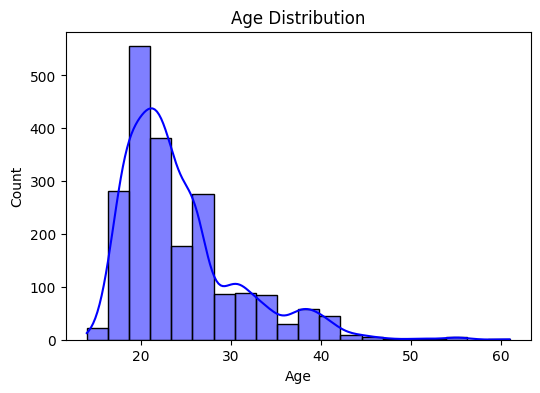

In [ ]:
#Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

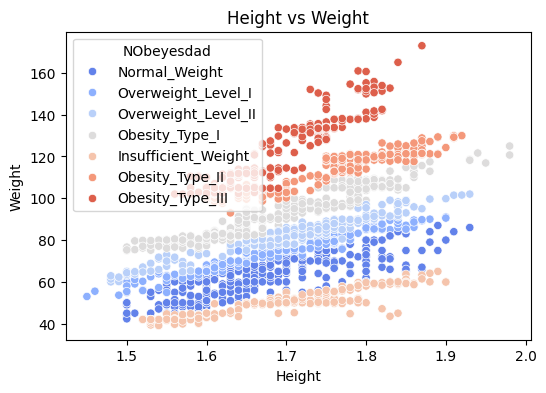

In [18]:
#Height vs Weight
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Height"], y=df["Weight"], hue=df["NObeyesdad"], palette="coolwarm")
plt.title("Height vs Weight")
plt.show()

In [21]:
#preprocessing 
categorical_columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])


print(df.head())

   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62    64.0                               1     0   2.0   
1       0   21    1.52    56.0                               1     0   3.0   
2       1   23    1.80    77.0                               1     0   2.0   
3       1   27    1.80    87.0                               0     0   3.0   
4       1   22    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


In [24]:
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=10000, multi_class="multinomial", solver="lbfgs")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\sky\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 85.65%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        82
           1       0.79      0.67      0.73        86
           2       0.88      0.86      0.87       106
           3       0.94      0.98      0.96        89
           4       0.99      0.99      0.99        97
           5       0.71      0.77      0.74        87
           6       0.78      0.74      0.76        87

    accuracy                           0.86       634
   macro avg       0.85      0.85      0.85       634
weighted avg       0.86      0.86      0.85       634



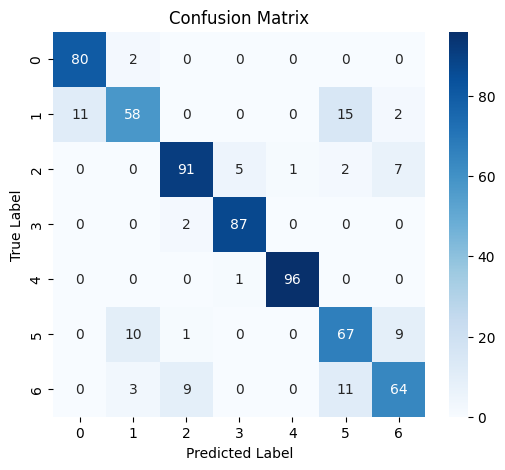

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()